# Modelado de Tópicos

* María Alejandra Arango
* Cristian Gómez Alvarez <crgomezal@unal.edu.co>
* Juan Camilo Cuartas

## Método

### Latent Dirichlet Allocation (LDA)

- Clase: Modelos generativos
- Tienen un tipo de fábula que explica como los datos fueron generados

- Primero se crean los tópicos asignando pesos probables a las palabras
- Cada tópico asigna diferentes pesos a diferentes palabras

- Modelo de "bolsa de palabras"


Explicación del modelo de Dirichlet (?)

## Modelado en Python

### Paquete 'gensim'

## Modelado en R

### Paquete 'topicmodels' - 'stm'

Averiguar cuál de los dos utiliza LDA (?)

Algoritmo

## Ejemplo

Modelar esos tópicos chiquitos en 

## Python

Importar corpora y models

In [3]:
from gensim import corpora, models
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Cargar los archivos de datos en la variable corpus. La variable almacena todos los documentos de texto en una forma fácil de procesar

In [8]:
corpus = corpora.BleiCorpus('datos/ap.dat', 'datos/vocab.txt')

Se crea un modelo de temas usando corpus cómo base de información. Información sobre LdaModel se puede encontrar en https://radimrehurek.com/gensim/models/ldamodel.html

La llamada de esta función inferirá qué temas están presentes en el corpus (colección de artículos o escritos sobre un tema particular)

In [9]:
modeloTemas = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word)

El modelo puede explorarse de diferentes formas. Utilizando model[doc] se puede ver la lista de temas a las que se refiere un documento.
Se visualizan como el Id del tema y la probabilidad que tiene asignada (ningún tema tiene probabilidad 0 pero por aproximación, algunos quedan con 0 y no se muestran)

In [7]:
len(corpus)    #Número de documentos en el corpus

2246

In [62]:
temas = [modeloTemas[c] for c in corpus]
print(temas[0])

[(3, 0.40388559040602212), (11, 0.026856075669584645), (15, 0.18338489661166033), (37, 0.035874296885641241), (41, 0.014952215114180798), (52, 0.052545514027481303), (56, 0.036529919702285966), (75, 0.032924293568477161), (88, 0.012712023601589593), (93, 0.1364492986141754), (96, 0.03361039933981886), (99, 0.010631335443377405)]


In [63]:
# Otra forma de visualizar los temas del primer documento
doc=corpus.docbyoffset(0)
temasDoc=modeloTemas[doc]
print(temasDoc)

[(3, 0.40587755061231656), (11, 0.026035214409023684), (15, 0.18302869747223535), (37, 0.035706738452867551), (41, 0.016004722127058901), (52, 0.05498895089327193), (56, 0.036839851200689562), (59, 0.013409955003075041), (75, 0.037197561873838728), (88, 0.012626566575326981), (93, 0.1334255691576286), (96, 0.034560797157502654)]


En el histograma del número de temas usados en el documento, puede visualizarse mejor este hecho

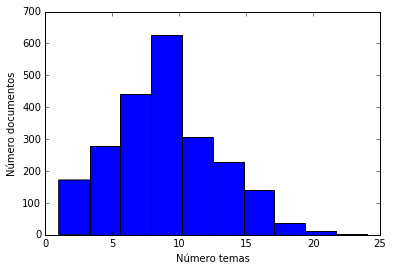

In [30]:
numTemas = [len(modeloTemas[doc]) for doc in corpus]    #Formar un array con los números de temas de cada documento
plt.hist(numTemas)
plt.ylabel('Número documentos')
plt.xlabel('Número temas')
plt.show()

El parámetro alpha del constructor de LdaModel define cómo se distribuyen cuántos temas pueden tratarse por documento, tiene un valor entre 0 y 1 y por defecto tiene el valor de 1/num_topics

In [31]:
modeloTemasAlpha=models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word, alpha=1)

Al hacer el histograma nuevamente, se encontrará que hay una distribución de temas por documento diferente

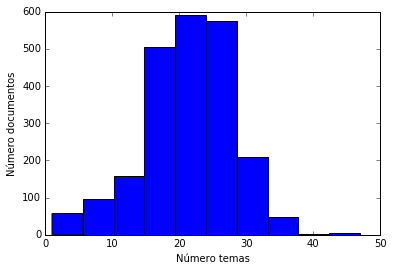

In [34]:
numTemasAlpha = [len(modeloTemasAlpha[doc]) for doc in corpus]            #Formar un array con los números de temas de cada documento
plt.hist(numTemasAlpha)
plt.ylabel('Número documentos')
plt.xlabel('Número temas')
plt.show()

Los temas son distribuciones multinomiales que se hacen sobre las palabras (cada palabra tiene una probabilidad para cada tema y aquellas palabras con mayor probabilidad pertenencen al tema).

Mostrar las palabras que conforman el primer tema:

In [64]:
palabras=modeloTemas.show_topic(3, 64)
print(palabras)

[('ruby', 0.051663868980996855), ('mecham', 0.024315685363037666), ('watkins', 0.018403418716222537), ('gun', 0.011551356149153131), ('milstead', 0.010639651971742128), ('birthday', 0.009477753956222747), ('mayer', 0.0081678926218770216), ('grandfather', 0.0070423882633605678), ('pastor', 0.006762924098240585), ('trial', 0.0063331443157548508), ('baptist', 0.0062086375790862272), ('mechams', 0.0060006571594056757), ('years', 0.0058340813557953468), ('state', 0.0049397930354346878), ('communitys', 0.0044937651734415903), ('disneys', 0.0040767162895099475), ('president', 0.0039931339374073204), ('threat', 0.003904849134783376), ('monday', 0.0038203664222758072), ('subway', 0.0038000708406188523), ('mouse', 0.003727742668668804), ('nephew', 0.0037148273009717249), ('cartoon', 0.0036918864889538996), ('default', 0.0036823737293599479), ('two', 0.0036372023588885152), ('cbs', 0.003541191610819179), ('shores', 0.0034311915275994326), ('yearold', 0.0034099842846692695), ('senators', 0.0032996

#### Comparación de documentos por temas

La clasificación de documentos por temas es un paso intermedio para otro objetivo mayor. Hasta esta parte tenemos un estimado de los temas por los que está compuesto un documento, lo que nos permite comparar documentos en el espacio de temas. El objetivo entonces es pasar de una comparación palabra por palabra a identificar documentos similares determinando si tratan sobre los mismos temas.

Se generan objetos de NumPy con los temas de todos los documentos en el corpus para calcular las distancias entre cada documento

In [65]:
from gensim import matutils
topics = matutils.corpus2dense(modeloTemas[corpus], num_terms=modeloTemas.num_topics)

topics es una matriz y podemos usar la función pdist de SciPy para calcular las distancias por parejas. Con un llamado a la función, se están calculando todos los valores de sum((topics[ti] – topics[tj])**2):

In [66]:
from scipy.spatial import distance
pairwise = distance.squareform(distance.pdist(topics))

Ahora se ajusta un poco la matriz de distancias modificando los elementos e la diagonal para que sean más grandes que la distancia más grande. Sin este ajuste, la función a continuación siempre retornaría el mismo documento como el más cercano

In [67]:
largest = pairwise.max()
for ti in range(len(topics)):
	pairwise[ti,ti] = largest+1

Por último construímos un clasificador de temas por proximidad (distancia más baja). Documentación de NumPy.argmin(): http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.argmin.html

In [73]:
def closest_to(doc_id):
    closest=pairwise[doc_id].argmin()
    return closest
    #return [topics[doc_id], topics[closest]]

Obtener el documento más parecido a aquel con ID 1:

In [75]:
closest_to(2)

92

### R

## Modelando Wikipedia